### Loss Function

A loss function is used to optimize the parameter values in a neural network model. Loss functions map a set of parameter values for the network onto a scalar value that indicates how well those parameter accomplish the task the network is intended to do.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np 
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Lets create some random data first

In [4]:
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

#### L2 Norm

The L2 norm calculates the distance of the vector coordinate from the origin of the vector space. As such, it is also known as the Euclidean norm as it is calculated as the Euclidean distance from the origin.

The L2 norm is calculated as the square root of the sum of the squared vector values.

L2-norm loss function is also known as least squares error (LSE).

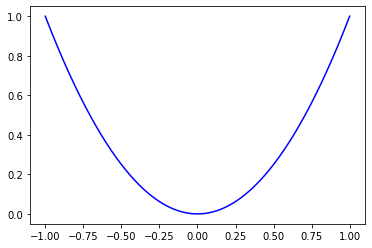

In [5]:
sess = tf.Session()
l2_y_vals = tf.square(target-x_vals)
l2_y_out = sess.run(l2_y_vals)
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-')
plt.show()

### L1 Norm

L1-norm loss function is also known as least absolute deviations (LAD), least absolute errors (LAE). It is basically minimizing the sum of the absolute differences (S) between the target value (Yi) and the estimated values (f(xi))

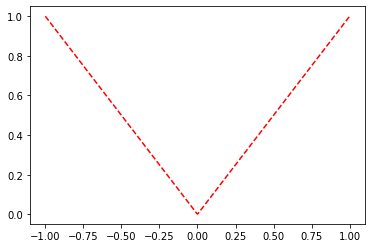

In [6]:
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)
x_array = sess.run(x_vals)
plt.plot(x_array, l1_y_out, 'r--')
plt.show()

### Pseudo-Huber loss

The Pseudo-Huber loss function can be used as a smooth approximation of the Huber loss function. It combines the best properties of L2 squared loss and L1 absolute loss by being strongly convex when close to the target/minimum and less steep for extreme values. This steepness can be controlled by the {\displaystyle \delta }\delta  value. The Pseudo-Huber loss function ensures that derivatives are continuous for all degrees

The Huber loss function is used in robust statistics, M-estimation and additive modelling

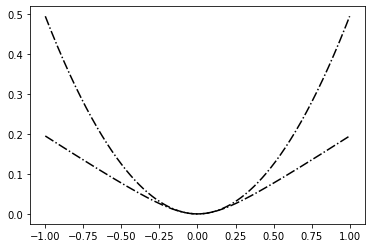

In [7]:
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + 
                        tf.square((target - x_vals)/delta1)) - 1.)

x_array = sess.run(x_vals)
phuber1_y_out = sess.run(phuber1_y_vals)
plt.plot(x_array, phuber1_y_out, 'k-.')

delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)
plt.plot(x_array, phuber2_y_out, 'k-.')

Loss functions for categorical outcomes. Lets create new dataset

In [8]:
x_vals = tf.linspace(-3., 5., 500)
target = tf.constant(1.)
targets = tf.fill([500,], 1.)

### Hinge loss

In machine learning, the hinge loss is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" classification, most notably for support vector machines (SVMs).[1]

For an intended output t = ±1 and a classifier score y, the hinge loss of the prediction y is defined as

l(y) = max(0,1 - t.y)

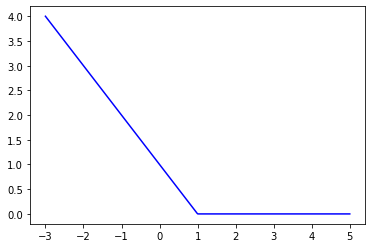

In [9]:
hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-')

### Cross-Entropy loss

Cross Entropy is definitely a good loss function for Classification Problems, because it minimizes the distance between two probability distributions - predicted and actual. ... So cross entropy make sure we are minimizing the difference between the two probability.

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1.

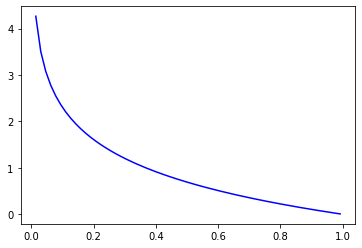

In [10]:
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)
x_array = sess.run(x_vals)
plt.plot(x_array, xentropy_y_out, 'b-')

### Binary Cross-Entropy Loss

Also called Sigmoid Cross-Entropy loss. It is a Sigmoid activation plus a Cross-Entropy loss.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


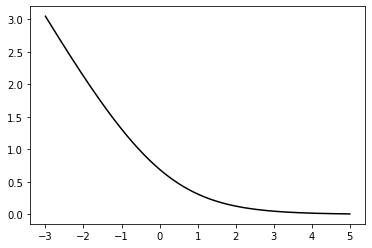

In [11]:
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals, labels=targets)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)
x_array = sess.run(x_vals)
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-')

### Weighted cross entropy loss

Instructions for updating:
targets is deprecated, use labels instead


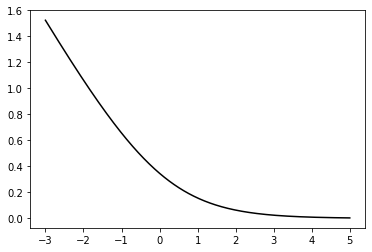

In [12]:
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(logits=x_vals, targets=targets, pos_weight=weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)
x_array = sess.run(x_vals)
plt.plot(x_array, xentropy_weighted_y_out, 'k-')

Combining all plot in one

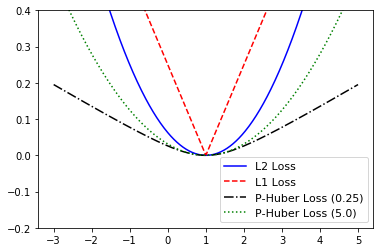

In [13]:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

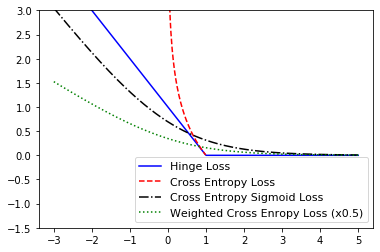

In [14]:
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Enropy Loss (x0.5)')
plt.ylim(-1.5, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()